# Final Assignment of Machine Learing

# Analysis of success using various models in Kickstater

This is experiment about who registered at Kickstarter 

# 기계학습 기말과제 

## KickStarter의 다양한 모델을 이용한 성공여부 분석

Kickstarter에서 사업이나 상품을 등록한 사람이 모금 목표액을 채울 수 있을 지의 여부에 대한 예측을 할 수 있도록 다양한 모델에 대한 실험이다. kickstart란 개인이나 기업이 상품 아이디어, 기한, 모금 목표액을 선택하여 등록하면 킥스타터의 회원들이 후원을 통해 지원하는 캠페인이다.

먼저 데이터의 attribute 중에 사용할 수 있는 것들을 필요한 값들로 변환을 해주는 과정을 통해 적합한 attribute set을 만들어 주었다. 그 후 Decision Tree, Multi-Layered Perceptron, Random Forest, Naive Bayes, Keras의 딥러닝 라이브러리를 사용하여 모델을 만들어서 성능을 평가하여 적합한 모델을 찾는 과정을 가지는 실험이였다.

In [1]:
import pandas as pd

In [2]:
train_path = 'C:/Users/User/JupyterNotebook/ML/ks-projects-201801.csv'

In [3]:
ks = pd.read_csv(train_path)

In [4]:
ks

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [5]:
import matplotlib.pyplot as plt

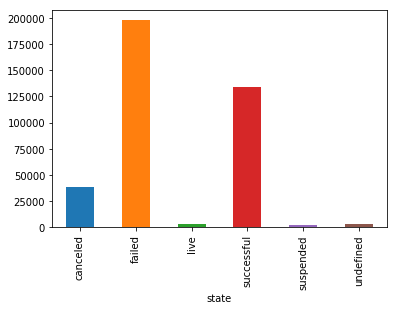

In [6]:
ks.groupby('state')['ID'].nunique().plot(kind='bar')

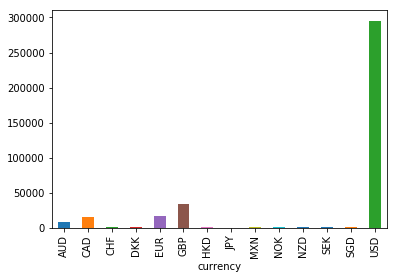

In [7]:
ks.groupby('currency')['ID'].nunique().plot(kind='bar')

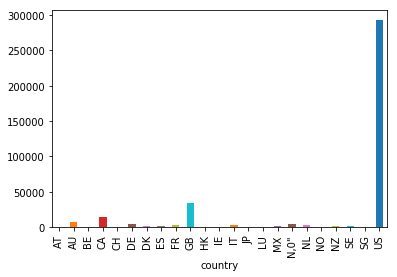

In [8]:
ks.groupby('country')['ID'].nunique().plot(kind='bar')

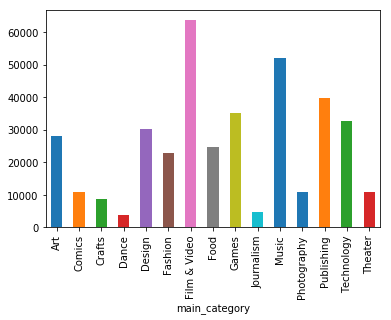

In [9]:
ks.groupby('main_category')['ID'].nunique().plot(kind='bar')

## 데이터

이 데이터는 kickstarter에서 등록되어 있는 상품들의 등록 ID, 상품 이름, 카테고리, 기한, 목표 모금액, 모금액, 통화, 후원자 수, 나라, 성공하였는지 여부에 대한 dataset이다. 

main_category : 각 상품이 어디에 속하는지를 총 15개의 종류로 크게 나눈 카테고리이다.
category : 각 상품이 정확이 어떠한 종류로 분류될 수 있는지 총 159개로 나눈 카테고리이다.
goal : 상품을 등록한 개인이나  기업이 프로젝트를 시작하기 위해서 총 필요로 하는 초기 자금이다. 
pledged : 실제 상품이 받은 지원 기금의 총 합이다. 만약 이 값이 goal보다 크면 state가 succesful가 된다.
backer : 상품에 지원한 총 인원이다.
currency : 어느 통화를 이용하여 지원을 받는 지이다.
country : 상품을 등록한 개인이나 기업의 속해 있는 국가이다.

URL : https://www.kaggle.com/kemical/kickstarter-projects

## 전처리

In [10]:
ks=ks[ks.state!='canceled']
ks=ks[ks.state!='live']
ks=ks[ks.state!='suspended']
ks=ks[ks.state!='undefined']  

state에서 successful인지 failed인지만 구분하기 위해 나머지 값들을 가지고 있는 instance들을 제거하여 주었다.

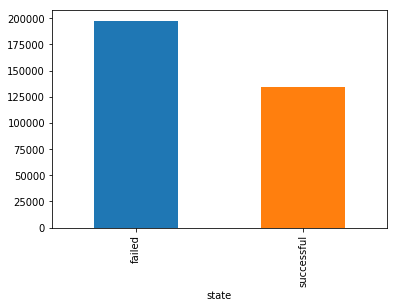

In [11]:
ks.groupby('state')['ID'].nunique().plot(kind='bar')

In [12]:
ks=ks.drop(columns=['name','ID']) 
#instance당 하나인 name과 id 데이터를 없애 주었다.

In [13]:
ks=ks.drop(columns=['usd pledged','usd_pledged_real']) 
#그 다음 usd pledged, pledge, usd_pledged_real은 유사한 값들을 가지기 때문에 pledge  제외 제거 

In [14]:
ks=ks.drop(columns=['usd_goal_real']) 
#goal과  usd_goal_real도 유사한 값을 가진다고 판단하여 제거하여 주었다.

In [15]:
ks.count() 
#별도의 missing value가 존재하지 않는지 확인. 존재하지 않는다.

category         331675
main_category    331675
currency         331675
deadline         331675
goal             331675
launched         331675
pledged          331675
state            331675
backers          331675
country          331675
dtype: int64

데이터 중 launched와 deadline은 날짜보다는 그 기간이 더 중요한 의미를 가질 것이라고 생각하여, deadline을 삭제하고 기간으로 변환시켰다. 또한 goal과 pledge는 유사한 양의 데이터이므로 그 값보다 goal:pledge의 비율이 더 의미 있다고 생각해 pledge를 비율로 변환 시켰다.

In [16]:
ks.dtypes #attribute들이 어떤 타입을 갖는지 확인하였다.

category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers            int64
country           object
dtype: object

In [17]:
ks.pledged=ks.pledged/ks.goal
ks = ks.rename(columns={'pledged':'pledged_rate'})

In [18]:
ks['deadline'] = pd.to_datetime(ks['deadline']) - pd.to_datetime(ks['launched']) 
ks['launched'] = pd.to_datetime(ks['launched']) 
ks = ks.rename(columns={'deadline':'term'})

In [19]:
import numpy as np

In [20]:
ks[['term']]=ks[['term']].apply(np.float64)
ks[['launched']]=ks[['launched']].apply(np.float64) 
#timedelta 를 사용하기 위해 float type로 변환해 주었다.

datatype가 object인 attribute들을 ordinal encoder을 통해서 float 타입으로 바꾸는 전처리를 해주었다.

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [22]:
ord_enc = OrdinalEncoder()

In [23]:
ord_enc.fit(ks[['main_category', 'category','currency','state','country']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [24]:
ks[['main_category', 'category','currency','state','country']]=ord_enc.transform(ks[['main_category', 'category','currency','state','country']])

전체 data set을 train set, validation set, test set으로 구분하여 분류하여 주었다.

In [25]:
train = ks.sample(frac=0.8)
valid = train.sample(frac=0.25)

In [26]:
test = ks.drop(index=train.index)

In [27]:
train_x=train.drop(columns='state')
train_y=train[['state']]
valid_x=valid.drop(columns='state')
valid_y=valid[['state']]
test_x=test.drop(columns='state')
test_y=test[['state']]

## Decision Tree

가장 먼저 linear model의 대표적 예인 Decision Tree에 대해서 model을 만들어 보기로 하였다.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DTmodel = DecisionTreeClassifier()

In [30]:
DTmodel.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
DTmodel.score(test_x,test_y)

0.9999397000075375

결과값이 1에 가깝게 정확하다는 것을 볼 수 있다. 이는  state value를 두 가지로 축약하였고, state 값은 pledged_rate 값이 1 이상이라는 의미와 동일하므로 decision tree에서는 pledged_rate 값이 1이상이면 state가 successful이라고 판단하면 되기 때문에 이렇게 결과값이 도출 되었다.

실제로 pledged rate는 도출해야 하는 값이기 때문에 state를 예측하는데 사용하는 것은 좋지 않다고 판단하여 제거하여 주었다. 이 attribute은 classification model로서 state를 예측하는 대신에 pledged rate에 대한 regression model을 만드는 데 더 적합한 데이터로 보인다.

In [32]:
train_x=train_x.drop(columns='pledged_rate')
valid_x=valid_x.drop(columns='pledged_rate')
test_x=test_x.drop(columns='pledged_rate')

In [33]:
DTmodel.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
DTmodel.score(valid_x,valid_y)

1.0

In [35]:
DTmodel.score(test_x,test_y)

0.8974749378156328

pledged와 비슷한 이유로 backers 또한 투자한 인원 이기 때문에 실제로 예측해야하는 값이고, 주어지는 값이 아니기 때문에 attribute에서 이를 제외하였다.

In [36]:
train_x=train_x.drop(columns='backers')
valid_x=valid_x.drop(columns='backers')
test_x=test_x.drop(columns='backers')

In [37]:
DTmodel.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
DTmodel.score(valid_x,valid_y)

1.0

In [39]:
DTmodel.score(test_x,test_y)

0.6057435742820532

test set에서의 성능은 60%인데 비해 validation set에서는 모두 원하는 state 값을 도출해 낸다는 사실을 알 수 있다. 이를 통해 이 모델을 overfit 되었다는 것을 알 수 있고, 그를 해결하기 위해 pruning를 사용하기로 하였다.

In [40]:
DTmodel=DecisionTreeClassifier(min_samples_split=1000, max_depth=10)

DTmodel.fit(train_x,train_y)
print("Score of model in validation set is",DTmodel.score(valid_x,valid_y))
print("Score of model in test set is",DTmodel.score(test_x,test_y))

Score of model in validation set is 0.669872616265923
Score of model in test set is 0.663073792115776


너무 깊은 Tree를 만드는 것을 방지하기 위해 최대 깊이는 10이고 노드의 최대 크기를 1000으로 설정하여 model을 만들어 보았다. 이렇게 설정하니 validation set과 test set의 결과가 거의 비슷하게 나와 underfit 되었다고 예상하였고, 그에 따라 다양한 tree를 만들어 테스트 해보았다.

In [41]:
valid_score=[]
test_score=[]
i=0

for mss in range(50,1000,100):
    DTmodel=DecisionTreeClassifier(min_samples_split=mss)
    print("min_samples_split is",mss)
    DTmodel.fit(train_x,train_y)
    valid_score.append(DTmodel.score(valid_x,valid_y))
    test_score.append(DTmodel.score(test_x,test_y))
    print("Score of model in validation set is",valid_score[i])
    print("Score of model in test set is",test_score[i])
    print()
    i+=1


min_samples_split is 50
Score of model in validation set is 0.7666691791663526
Score of model in test set is 0.6413657948292757

min_samples_split is 150
Score of model in validation set is 0.7182030602246174
Score of model in test set is 0.6641441169819854

min_samples_split is 250
Score of model in validation set is 0.702856712142911
Score of model in test set is 0.6689681163789855

min_samples_split is 350
Score of model in validation set is 0.6960428129946484
Score of model in test set is 0.6696766412904198

min_samples_split is 450
Score of model in validation set is 0.6916559885430015
Score of model in test set is 0.6692394663450667

min_samples_split is 550
Score of model in validation set is 0.6887465139066857
Score of model in test set is 0.6708072661490917

min_samples_split is 650
Score of model in validation set is 0.6863948142006482
Score of model in test set is 0.6705811411773573

min_samples_split is 750
Score of model in validation set is 0.6832441395944826
Score of mod

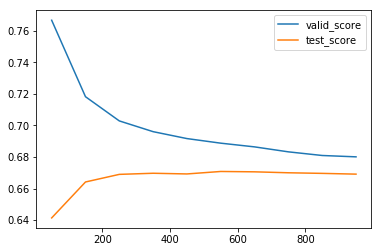

In [42]:
plt.plot([mss for mss in range(50,1000,100)],valid_score,label='valid_score')
plt.plot([mss for mss in range(50,1000,100)],test_score,label='test_score')
plt.legend()

min_samples_split은 250-500 근처일때 test set의 성능이 좋다고 값이 나타났고, 더 진행 되었을 때 validation set의 성능만 낮아지고 test set의 결과는 변화가 거의 없기 때문에 이 데이터만 사용하였을 때 250 가량이 적합하다고 판단하였다.

max_depth is 5
Score of model in validation set is 0.6378985452626819
Score of model in test set is 0.6345066706866662

max_depth is 10
Score of model in validation set is 0.6745307906836512
Score of model in test set is 0.6624557171930353

max_depth is 15
Score of model in validation set is 0.7291173588603301
Score of model in test set is 0.6603301424587322

max_depth is 20
Score of model in validation set is 0.8245119469360066
Score of model in test set is 0.6402200949724881

max_depth is 25
Score of model in validation set is 0.9163789854526269
Score of model in test set is 0.6208487223939096



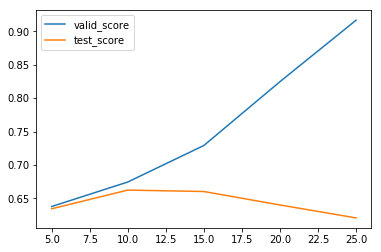

In [43]:
valid_score=[]
test_score=[]
i=0

for md in range(5,30,5):
    DTmodel=DecisionTreeClassifier(max_depth=md)
    print("max_depth is",md)
    DTmodel.fit(train_x,train_y)
    valid_score.append(DTmodel.score(valid_x,valid_y))
    test_score.append(DTmodel.score(test_x,test_y))
    print("Score of model in validation set is",valid_score[i])
    print("Score of model in test set is",test_score[i])
    print()
    i+=1
    
plt.plot([md for md in range(5,30,5)],valid_score,label='valid_score')
plt.plot([md for md in range(5,30,5)],test_score,label='test_score')
plt.legend()

max depth가 15보다 작아져도 test set의 결과는 차이가 거의 없고 validation set에서의 성능만 변화가 있기 때문에 max depth는 15가 적합하다고 판단하였다. 그리고 min sample split은 특이한 경우에 작은 노드에 대해서 예외처리의 용도로 사용하는 것이 맞다고 생각하여 250을 사용하기 애매하여 몇가지 값에 대해 모델을 만들었다.

min_samples_split is 50
Score of model in validation set is 0.710258536217683
Score of model in test set is 0.6633451420818572

min_samples_split is 100
Score of model in validation set is 0.7028416371447953
Score of model in test set is 0.6668123916484511

min_samples_split is 150
Score of model in validation set is 0.6989824376271953
Score of model in test set is 0.6698424662696917

min_samples_split is 200
Score of model in validation set is 0.6953493630813297
Score of model in test set is 0.6702193412225823

min_samples_split is 250
Score of model in validation set is 0.6930881133639858
Score of model in test set is 0.6706263661717042

min_samples_split is 300
Score of model in validation set is 0.6906610386673702
Score of model in test set is 0.671199216100098

min_samples_split is 350
Score of model in validation set is 0.6896660887917389
Score of model in test set is 0.6698273912715761

min_samples_split is 400
Score of model in validation set is 0.6883093389613326
Score of mode

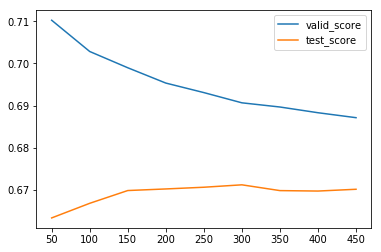

In [44]:
valid_score=[]
test_score=[]
i=0

for mss in range(50,500,50):
    DTmodel=DecisionTreeClassifier(max_depth=15, min_samples_split=mss)
    print("min_samples_split is",mss)
    DTmodel.fit(train_x,train_y)
    valid_score.append(DTmodel.score(valid_x,valid_y))
    test_score.append(DTmodel.score(test_x,test_y))
    print("Score of model in validation set is",valid_score[i])
    print("Score of model in test set is",test_score[i])
    print()
    i+=1
    
plt.plot([mss for mss in range(50,500,50)],valid_score,label='valid_score')
plt.plot([mss for mss in range(50,500,50)],test_score,label='test_score')
plt.legend()


min sample split을 200으로 사용하는게 좋은 결과를 나타내었다. 그래프는 200일때 최대값을 보여주었고 valid_score은 계속해서 낮아지는 결과를 볼 수 있었다.


### Decision Tree의 최종 모델

max depth가 15이고 최소 노드의 크기가 200일때 가장 좋은 model이 생성되었다. 결과는 67.04%의 성능을 띄는 모델이 생성되었다.




## Multi-Layered Perceptron

non-linear model의 대표적인 예시로서 MLP로 model을 만들어 보기로 하였다.

In [45]:
from sklearn.neural_network import MLPClassifier

In [46]:
MLPmodel=MLPClassifier()

In [47]:
MLPmodel.fit(train_x, train_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [48]:
MLPmodel.score(test_x, test_y)

0.5959900505012437

In [49]:
MLPmodel.score(valid_x, valid_y)

0.5947388256576468

아무런 조작 없이 MLP로 모델을 만들었을 때 결과값이다. validation set과 test set의 성능차이가 거의 없고, 상당히 낮은 성능을 보여준다. underfit 되었다고 볼 수 있다. 조금 더 정밀한 모델을 만들기 위해 hidden layer의 개수를 늘려주었다.

In [50]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd')

In [51]:
MLPmodel.fit(train_x, train_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(250, 100, 50, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [52]:
MLPmodel.score(test_x, test_y)

0.5959900505012437

In [53]:
MLPmodel.score(valid_x, valid_y)

0.5947388256576468

hidden layer의 수를 늘려도 15% 정도의 성능이 좋아지긴 했지만 validation과 test set의 성능이 비슷한 것으로 보아 마찬가지로 underfit 되었다고 생각할 수 있다. 계속해서 늘려보면서 차이를 비교해보았다. 그리고 계산 시간이 너무 길어지는 것을 방지하기 위해서 learning_rate_init의 크기를 늘리고 max_iter의 크기를 줄여주었다.

MLPmodel=MLPClassifier(hidden_layer_sizes=(500, 250, 100, 50, 20, 10,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=100)
MLPmodel.fit(train_x, train_y)

너무 오래걸리므로 좋은 모델로 이용되기 어려워 보인다. 이유는 이 dataset이 너무 크기 때문으로 여겨져서 instance를 10000개만 이용하여 새로운 데이터 셋을 만들고 그 데이터를 이용해서 계속해서 실험해보도록 하였다.

In [54]:
train_mlp_x=train_x[:10000]
train_mlp_y=train_y[:10000]
valid_mlp = train[:10000].sample(frac=0.25)
valid_mlp_x=valid_mlp.drop(columns=['state','pledged_rate','backers'])
valid_mlp_y=valid_mlp[['state']]
test_mlp_x=test_x[:10000]
test_mlp_y=test_y[:10000]

In [55]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd')

In [56]:
MLPmodel.fit(train_mlp_x, train_mlp_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(250, 100, 50, 20, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
MLPmodel.score(test_mlp_x, test_mlp_y)

0.5904

In [58]:
MLPmodel.score(valid_mlp_x, valid_mlp_y)

0.6128

10000개로 줄여도 거의 성능의 변화가 없으나 시간이 확연하게 줄어듬을 알 수 있다. 이 data를 이용하여 hidden layer을 늘려가며 적합한 모델을 찾아보도록 하였다.

In [59]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(500, 250,100, 50, 20, 10,), activation='logistic', solver='sgd')

In [60]:
MLPmodel.fit(train_mlp_x, train_mlp_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 250, 100, 50, 20, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='sgd',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
MLPmodel.score(test_mlp_x, test_mlp_y)

0.5904

In [62]:
MLPmodel.score(valid_mlp_x, valid_mlp_y)

0.6128

hidden layer을 늘렸음에도 성능이 변하지 않았다. local minima에 빠져서 원하는 값이 나오지 않았다고 판단하여 hidden layer을 다시 줄이고 learning rate와 momentum에 변화를 주어보았다.

In [63]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd',learning_rate_init=0.1)

In [64]:
MLPmodel.fit(train_mlp_x, train_mlp_y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(250, 100, 50, 20, 10), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [65]:
MLPmodel.score(test_mlp_x, test_mlp_y)

0.5904

In [66]:
MLPmodel.score(valid_mlp_x, valid_mlp_y)

0.6128

In [67]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd',learning_rate_init=0.01)

MLPmodel.fit(train_mlp_x, train_mlp_y)

print(MLPmodel.score(test_mlp_x, test_mlp_y))
print(MLPmodel.score(valid_mlp_x, valid_mlp_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5904
0.6128


In [68]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd',learning_rate_init=0.0001)

MLPmodel.fit(train_mlp_x, train_mlp_y)

print(MLPmodel.score(test_mlp_x, test_mlp_y))
print(MLPmodel.score(valid_mlp_x, valid_mlp_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5904
0.6128


In [69]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd',momentum=0.5)

MLPmodel.fit(train_mlp_x, train_mlp_y)

print(MLPmodel.score(test_mlp_x, test_mlp_y))
print(MLPmodel.score(valid_mlp_x, valid_mlp_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5904
0.6128


In [70]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(250,100, 50, 20, 10,), activation='logistic', solver='sgd',momentum=0.99)

MLPmodel.fit(train_mlp_x, train_mlp_y)

print(MLPmodel.score(test_mlp_x, test_mlp_y))
print(MLPmodel.score(valid_mlp_x, valid_mlp_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5904
0.6128


In [71]:
MLPmodel = MLPClassifier(hidden_layer_sizes=(100, 50, 20, 10,), activation='relu', solver='adam',momentum=0.99)

MLPmodel.fit(train_mlp_x, train_mlp_y)

print(MLPmodel.score(test_mlp_x, test_mlp_y))
print(MLPmodel.score(valid_mlp_x, valid_mlp_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5904
0.6128


정확한 이유는 알 수 없지만 다양한 값의 변화를 주어도 결과가 계속 동일한 값을 나타낸다. 데이터가 정확한 값을 예측하기 힘들고 양이 방대해 MLP가 깊은 layer에서 vanishing gradient의 문제가 나타나서 원하는 결과가 나타나지 않는 것으로 생각된다. 

결론적으로 Multi-Layered Perceptron을 이용한 모델은 59% 정도의 성능으로 좋은 성능을 내지 못했고, 거대한 양의 데이터가 있을 때에는 좋은 방법으로 여겨지지 않는다.

## Random Forest

MLP에서 backpropagation이 제대로 작동하지 않았기 때문에 다른 neural network로 시도해 보았다. Decision Tree들의 앙상블 기법을 이용하여 만드는 Random Forest을 이용해 모델로 만들어 보았다.

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RFmodel = RandomForestClassifier(random_state=1)
RFmodel.fit(train_x, train_y)

print(RFmodel.score(test_x, test_y))
print(RFmodel.score(valid_x, valid_y))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6536971432878571
0.9792568025928997


기본 random forest 알고리즘에 대해 실행을 해 보았을 때 상당히 overfitting 된 모습을 확인할 수 있다. 그에 따라서 decision tree에서 했던 것처럼 여기에서도 max_depth 변경을 통해서 조금 더 원하는 모델을 찾아보려고 하였다.

max_depth is 5


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of model in validation set is 0.6440189944976257
Score of model in test set is 0.6446219944222507

max_depth is 10


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of model in validation set is 0.6772141403482325
Score of model in test set is 0.669993216250848

max_depth is 15


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of model in validation set is 0.7336097082987865
Score of model in test set is 0.6799728650033918

max_depth is 20


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of model in validation set is 0.8440189944976257
Score of model in test set is 0.671440416069948

max_depth is 25


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of model in validation set is 0.9336549332931333
Score of model in test set is 0.663556192055476



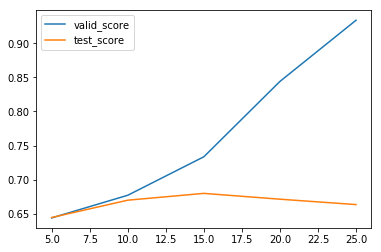

In [74]:
valid_score=[]
test_score=[]
i=0

for md in range(5,30,5):
    RFmodel = RandomForestClassifier(max_depth=md,random_state=1)
    print("max_depth is",md)
    RFmodel.fit(train_x, train_y)
    valid_score.append(RFmodel.score(valid_x,valid_y))
    test_score.append(RFmodel.score(test_x,test_y))
    print("Score of model in validation set is",valid_score[i])
    print("Score of model in test set is",test_score[i])
    print()
    i+=1
    
plt.plot([md for md in range(5,30,5)],valid_score,label='valid_score')
plt.plot([md for md in range(5,30,5)],test_score,label='test_score')
plt.legend()

decision tree와 마찬가지로 15일때 가장 test의 성능이 좋았다. 하지만 Decision Tree와 비교했을때 1% 정도의 차이밖에 나타나지 않는 것으로 보아 데이터 셋의 구조가 크게 변칙적이지 않고 일정하다는 것을 알 수 있었다.

그래서 이 Random Forest를 이용하였을 때는 MLP와는 다르게 제대로 작동하였으며, 커다란 데이터에서도 잘 작동한다는 것을 알 수 있었다. 최대 68%의 성능을 보이는 모델을 생성하였다.

## Naive Bayes

데이터가 크게 복잡하지 않고, 크지만 단순한 구조를 가졌으므로 수학적 계산을 통해서 답을 도출해 내었을때는 어떤 결과를 나타내는지 궁금하여 naive bayes를 이용하여 classify해 보았다.

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
NBmodel = MultinomialNB()
NBmodel.fit(train_x, train_y)

print(NBmodel.score(test_x, test_y))
print(NBmodel.score(valid_x, valid_y))

0.4861686892289138
0.4846461144192357


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


그저 수학적으로 확률을 계산한 것이기 때문에 underfit 되었다고 생각할 수 없다. 이렇게 계산한 결과값의 경우 50%도 되지 않는 성능을 보이기 때문에 좋은 모델로서 채택될 수 없다.

## Keras의 Deep Learning 라이브러리

기본적인 기계학습 모델에 대해서는 전반적으로 생각해 보았고, 딥러닝에 대해 어떤 결과를 얻는지 확인해 보기 위해 keras의 sequential model을 사용하여 학습시켜 보았다.

In [77]:
import keras

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [78]:
from keras.models import Sequential

In [79]:
Smodel = Sequential()

In [80]:
from keras.layers import Dense, InputLayer

In [81]:
Smodel.add(InputLayer(input_shape=(7,)))

In [82]:
Smodel.add(Dense(units=10, activation='relu'))
Smodel.add(Dense(units=6, activation='relu'))
Smodel.add(Dense(units=3, activation='relu'))
Smodel.add(Dense(units=1, activation='sigmoid'))

In [83]:
Smodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [84]:
Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

data의 양이 너무 많기 때문에 MLP에서 사용했듯이 10000개의 instance에 대해서만 학습해보도록 하였다.

In [85]:
train_s_x=train_x[:10000]
train_s_y=train_y[:10000]
valid_s = train[:10000].sample(frac=0.25)
valid_s_x=valid_s.drop(columns=['state','pledged_rate','backers'])
valid_s_y=valid_s[['state']]
test_s_x=test_x[:10000]
test_s_y=test_y[:10000]

In [86]:
Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 4s 432us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 2/20
10000/10000 [==============================] - 1s 125us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 3/20
10000/10000 [==============================] - 1s 128us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 4/20
10000/10000 [==============================] - 1s 127us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 5/20
10000/10000 [==============================] - 1s 128us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 6/20
10000/10000 [==============================] - 1s 122us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - val_acc: 0.4096
Epoch 7/20
10000/10000 [==============================] - 1s 125us/step - loss: 0.6009 - acc: 0.3991 - val_loss: 0.5904 - 

먼저 4개의 layer을 통해서 어떠한 결과를 갖는지 학습을 시켜보았다.
acc와 val_acc가 비슷한 것으로 보아 underfit 되었다고 생각하여 layer을 하나 더 추가하여 결과를 보았다.

In [87]:
Smodel = Sequential()

Smodel.add(InputLayer(input_shape=(7,)))

Smodel.add(Dense(units=20, activation='relu'))
Smodel.add(Dense(units=10, activation='relu'))
Smodel.add(Dense(units=6, activation='relu'))
Smodel.add(Dense(units=3, activation='relu'))
Smodel.add(Dense(units=1, activation='sigmoid'))

Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 139us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 2/20
10000/10000 [==============================] - 1s 132us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 3/20
10000/10000 [==============================] - 1s 133us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 4/20
10000/10000 [==============================] - 1s 131us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 5/20
10000/10000 [==============================] - 1s 135us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 6/20
10000/10000 [==============================] - 1s 127us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 7/20
10000/10000 [==============================] - 1s 122us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - 

In [88]:
Smodel = Sequential()

Smodel.add(InputLayer(input_shape=(7,)))

Smodel.add(Dense(units=50, activation='relu'))
Smodel.add(Dense(units=20, activation='relu'))
Smodel.add(Dense(units=10, activation='relu'))
Smodel.add(Dense(units=6, activation='relu'))
Smodel.add(Dense(units=3, activation='relu'))
Smodel.add(Dense(units=1, activation='sigmoid'))

Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 171us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 2/20
10000/10000 [==============================] - 1s 140us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 3/20
10000/10000 [==============================] - 1s 142us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 4/20
10000/10000 [==============================] - 1s 142us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 5/20
10000/10000 [==============================] - 1s 138us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 6/20
10000/10000 [==============================] - 1s 139us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - val_acc: 0.5904
Epoch 7/20
10000/10000 [==============================] - 1s 140us/step - loss: 0.3991 - acc: 0.6009 - val_loss: 0.4096 - 

regularizer를 추가하여 학습하여 보았다.

In [89]:
from keras.regularizers import l2

In [90]:
Smodel = Sequential()

Smodel.add(InputLayer(input_shape=(7,)))

Smodel.add(Dense(units=20, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=10, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=6, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=3, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(), bias_regularizer=l2()))

Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 198us/step - loss: 0.7423 - acc: 0.6009 - val_loss: 0.7317 - val_acc: 0.5904
Epoch 2/20
10000/10000 [==============================] - 1s 144us/step - loss: 0.7019 - acc: 0.6009 - val_loss: 0.6938 - val_acc: 0.5904
Epoch 3/20
10000/10000 [==============================] - 1s 142us/step - loss: 0.6663 - acc: 0.6009 - val_loss: 0.6603 - val_acc: 0.5904
Epoch 4/20
10000/10000 [==============================] - 1s 144us/step - loss: 0.6348 - acc: 0.6009 - val_loss: 0.6308 - val_acc: 0.5904
Epoch 5/20
10000/10000 [==============================] - 1s 143us/step - loss: 0.6071 - acc: 0.6009 - val_loss: 0.6048 - val_acc: 0.5904
Epoch 6/20
10000/10000 [==============================] - 1s 141us/step - loss: 0.5826 - acc: 0.6009 - val_loss: 0.5818 - val_acc: 0.5904
Epoch 7/20
10000/10000 [==============================] - 2s 151us/step - loss: 0.5610 - acc: 0.6009 - val_loss: 0.5616 - 

In [91]:
Smodel = Sequential()

Smodel.add(InputLayer(input_shape=(7,)))

Smodel.add(Dense(units=6, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=3, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(), bias_regularizer=l2()))

Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 2s 153us/step - loss: 0.7104 - acc: 0.3991 - val_loss: 0.6932 - val_acc: 0.4096
Epoch 2/20
10000/10000 [==============================] - 1s 124us/step - loss: 0.6975 - acc: 0.3991 - val_loss: 0.6811 - val_acc: 0.4096
Epoch 3/20
10000/10000 [==============================] - 1s 123us/step - loss: 0.6862 - acc: 0.3991 - val_loss: 0.6704 - val_acc: 0.4096
Epoch 4/20
10000/10000 [==============================] - 1s 125us/step - loss: 0.6761 - acc: 0.3991 - val_loss: 0.6610 - val_acc: 0.4096
Epoch 5/20
10000/10000 [==============================] - 1s 124us/step - loss: 0.6673 - acc: 0.3991 - val_loss: 0.6527 - val_acc: 0.4096
Epoch 6/20
10000/10000 [==============================] - 1s 125us/step - loss: 0.6595 - acc: 0.3991 - val_loss: 0.6454 - val_acc: 0.4096
Epoch 7/20
10000/10000 [==============================] - 1s 125us/step - loss: 0.6526 - acc: 0.3991 - val_loss: 0.6389 - 

In [92]:
Smodel = Sequential()

Smodel.add(InputLayer(input_shape=(7,)))

Smodel.add(Dense(units=10, activation='relu',kernel_regularizer=l2(), bias_regularizer=l2()))
Smodel.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(), bias_regularizer=l2()))

Smodel.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
Smodel.fit(x=train_s_x, y=train_s_y,  epochs=20, validation_data=(test_s_x, test_s_y))

Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 1s 149us/step - loss: 0.6815 - acc: 0.3991 - val_loss: 0.6660 - val_acc: 0.4096
Epoch 2/20
10000/10000 [==============================] - 1s 115us/step - loss: 0.6720 - acc: 0.3991 - val_loss: 0.6571 - val_acc: 0.4096
Epoch 3/20
10000/10000 [==============================] - 1s 114us/step - loss: 0.6636 - acc: 0.3991 - val_loss: 0.6493 - val_acc: 0.4096
Epoch 4/20
10000/10000 [==============================] - 1s 116us/step - loss: 0.6562 - acc: 0.3991 - val_loss: 0.6423 - val_acc: 0.4096
Epoch 5/20
10000/10000 [==============================] - 1s 115us/step - loss: 0.6497 - acc: 0.3991 - val_loss: 0.6362 - val_acc: 0.4096
Epoch 6/20
10000/10000 [==============================] - 1s 115us/step - loss: 0.6440 - acc: 0.3991 - val_loss: 0.6308 - val_acc: 0.4096
Epoch 7/20
10000/10000 [==============================] - 1s 113us/step - loss: 0.6389 - acc: 0.3991 - val_loss: 0.6261 - 

다양한 값들에 대해 실험을 해 보았지만 MLP와 마찬가지로 똑같은 값이 나와 실패하였다. hidden layer을 늘려도 똑같고, 다양한 변화를 시도해 보아도 결국 얻을 수 있는 값이 동일했다. vanishing gradient의 문제를 겪으며 성능이 좋아지지 않는 것을 보인다. 이를 통해 알 수 있던 것은 Perceptron의 단점을 neural network 딥러닝에서도 동일하게 지니고 있다는 점이다. 그래서 머신러닝을 통해서도 MLP를 사용하였을 때와 동일하게 최대 성능 60% 정도로 좋지 않은 결과를 보였다.

## 결론

Kickstarter의 결과 예측의 모델의 경우 Random Forest를 이용하여 모델을 생성하였을 때 68%로 가장 좋은 성능을 보였다. 그리고 Multi-Layered Perceptron과 딥러닝 라이브러리를 이용하였을 때는 오히려 underfit되어 Decision Tree보다도 좋지 않은 성능을 보였다. 이를 통해서 kickstarter와 같이 크고 단순한 데이터에 관해서는 복잡하고 엉켜있는 neural network보다는 오히려 단순한 모델이 더 빠르고 좋은 성능을 나타낸다는 사실을 알 수 있었다.